<a href="https://colab.research.google.com/github/phanmanhtung/Machine-Learning-and-Data-Mining-2/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/ggcolab/'  #change dir to your project folder

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

column = ["sepal length", "sepal width", "petal length", "petal width", "class"]
df = pd.read_csv("/content/gdrive/My Drive/iris.data", sep=',', header=None)
df.columns = column
myclass = df["class"]
df.head(5)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
# Get rid of class "Iris-setosa":
mydf = df[df['class'] != "Iris-setosa"]
twoclass = mydf["class"]
print(len(twoclass))

100


In [0]:
X = mydf.drop(["class"], axis=1).values
y = twoclass.values

# Turn the class into -1; 1 for training purpose
# Iris-versicolor = -1; Iris-virginica = 1
y = np.where(y == "Iris-versicolor", -1, 1)

# splitting the data into training and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [0]:
# Perceptron in action:
def h(sl, sw, pl, pw, w1, w2, w3, w4, b):
    return np.sign(sl*w1 + sw*w2 + pl*w3 + pw*w4 + b)

w1 = 0
w2 = 0
w3 = 0
w4 = 0
b = 0

alpha = 0.1
for j in range(1000):
  for i in range(0, len(X_train)):
    if h(X_train[i][0], X_train[i][1], X_train[i][2], X_train[i][3], w1, w2, w3, w4, b) != y_train[i]:
      w1 = w1 + alpha*y_train[i]*X_train[i][0]
      w2 = w2 + alpha*y_train[i]*X_train[i][1]
      w3 = w3 + alpha*y_train[i]*X_train[i][2]
      w4 = w4 + alpha*y_train[i]*X_train[i][3]
      b = b + alpha*y_train[i]

print(w1)
print(w2)
print(w3)
print(w4)
print(b)

-7.780000000000173
-8.32999999999988
12.160000000000304
23.299999999999656
-25.000000000000085


In [0]:
def which_flower(sl, sw, pl, pw):
    return np.sign(sl*w1 + sw*w2 + pl*w3 + pw*w4 + b)

which_flower(5,3,1,0.5)

-1.0

In [0]:
import sklearn.metrics as sm

# List of comprehension
y_pred = np.array([which_flower(i[0], i[1], i[2], i[3]) for i in X_test])

sm.accuracy_score(y_pred, y_test)

0.9666666666666667

In [0]:
# Using list of comprehension, we can turn np.array within 1 line!!!
print(type(y_pred))

<class 'numpy.ndarray'>


In [0]:
#______________________________Using PCA______________________________#

from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_data = preprocessing.scale(X)
 
pca = PCA(n_components=2) # create a PCA object
pca.fit(scaled_data) # do the math
X_pca = pca.transform(scaled_data) # get PCA coordinates for scaled_data

print(X_pca.shape)
print(y.shape)

(100, 2)
(100,)


In [0]:
def h(pc1, pc2, w1, w2, b):
    return np.sign(pc1*w1 + pc2*w2 + b)

w1 = 0
w2 = 0
b = 0
alpha = 1

for j in range(1000):
  for i in range(0, len(X_pca)):
    if h(X_pca[i][0], X_pca[i][1], w1, w2, b) != y[i]:
      w1 = w1 + alpha*y[i]*X_pca[i][0]
      w2 = w2 + alpha*y[i]*X_pca[i][1]
      b = b + alpha*y[i]

print(w1)
print(w2)
print(b)

2.873257795532451
3.899221277224042
2


In [0]:
def which_flower(pc1, pc2):
    return np.sign(pc1*w1 + pc2*w2 + b)

which_flower(2,3)

1.0

(-1.7161812507853758, 2.3299089668338917)

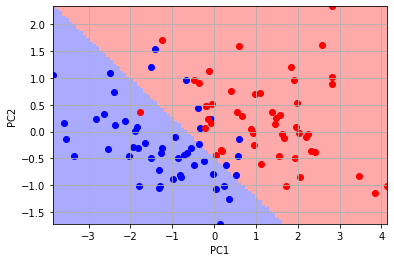

In [0]:
#MESH
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
#generate all the points in the plane using np.meshgrid(np.arange(x_min, x_min, super_small))
xx, yy = np.meshgrid(np.linspace(X_pca[:,0].min(), X_pca[:,0].max(), num=100), np.linspace(X_pca[:,1].min(), X_pca[:,1].max(), num=100))
Z = which_flower(xx.ravel(),yy.ravel())
Z = Z.reshape(xx.shape)

plt.figure()
# xx, yy are ALL the points in the plane, Z is the color of each area
# then plot the points using plt.scatter as usual
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

# Graph points
for i in range(0, len(X_pca)):
    if y[i] == 1:
        plt.scatter(X_pca[i][0], X_pca[i][1], c = 'r')
    elif y[i] == -1:
        plt.scatter(X_pca[i][0], X_pca[i][1], c = 'b')
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
#------x_min x_max y_min y_max

In [0]:
# Breast cancer dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size",
          "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]
df = pd.read_csv("/content/gdrive/My Drive/breast-cancer-wisconsin.data", sep=',', header=None, skipinitialspace=True)
df.columns = column

# Save the class information
myclass = df["Class"]

# Set the ID number as index
df.set_index("Sample code number", inplace=True)

# Get rid of class column for statistical analysis and PCA, append it latter
df.drop(['Class'],axis=1, inplace=True)

df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Sample code number,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1
1002945,5,4,4,5,7,10,3,2,1
1015425,3,1,1,1,2,2,3,1,1
1016277,6,8,8,1,3,4,3,7,1
1017023,4,1,1,3,2,1,3,1,1


In [0]:
X = df.replace("?", 1).values
y = myclass.values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=4)

In [0]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(tol=1e-3, random_state=0)
perceptron.fit(X_train, y_train)

# The obtained weights after running the algorithm
print(perceptron.coef_)

[[-4. 19.  6.  4. -2. 15.  5.  6. 11.]]


In [0]:
y_pred = perceptron.predict(X_test)
print(y_pred)

[4 2 2 2 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 4 2 2 4 4 2 4 2 2 2 4 2
 4 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 2 4 4 4 2 2 2 4 2]


In [0]:
sm.accuracy_score(y_pred, y_test)

0.9857142857142858